## Manuell

In [3]:
import numpy as np

- Natürliche Zahlen
- Ganze Zahlen
- Rationale Zahlen
- Rationale Zahlen und Irrationale Zahlen - > R
- Complexe Zahlen (Quantum Comp und Frequenz-Analyse) -> C schliesst R ein

In [4]:
X = [1,2,3,4,5,6,7,8,9,10]
X = np.array(X).astype(np.float32)

In [5]:
X

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)

In [6]:
X = np.arange(1,11).astype(np.float32)
X

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)

In [7]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [8]:
# BR: Wir kennen nur X und Y, aber die Parameter 2 und 6 müssen gesucht werden

# List comprehension
Y = [2*x + 6 for x in X]
print(Y)

[np.float32(8.0), np.float32(10.0), np.float32(12.0), np.float32(14.0), np.float32(16.0), np.float32(18.0), np.float32(20.0), np.float32(22.0), np.float32(24.0), np.float32(26.0)]


Wir erstellen hier eine Liste.
[   ]

2*x + 6 für jedes Element x in X

In [9]:
len(X)

10

(m_deriv
b_deriv)
m_deriv ist die partielle Ableitung nach m (Gewicht)
b_deriv ist --- nach b (Bias)

$MSE = 1/N\sum_{i=0} ^N (Y_i - (mX_i + b))^2$





In [10]:
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # Calculate partial derivatives
        # -x (innere Ableitung) * 2(y - (mx + b)) (äussere Ableitung)
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))


    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    history_m.append(m)
    history_b.append(b)

    return m,b


In [11]:
def train(epochs, learning_rate:int)-> tuple[float, float]:
    m=0
    b=0
    for epoch in range(epochs):
        # abbruchskriterium - "early stopping"
        m,b = update_weights(m, b, X, Y, learning_rate)
        if epoch%200==0:
          print(f"Epoch: {epoch}, m: {m}, b: {b}")
    return m,b

In [12]:
epochs = 3000
history_m = []
history_b = []

In [13]:
train(epochs, learning_rate=1e-2)

Epoch: 0, m: 2.200000047683716, b: 0.3400000035762787
Epoch: 200, m: 2.3450541496276855, b: 3.5977935791015625
Epoch: 400, m: 2.148714303970337, b: 4.964677810668945
Epoch: 600, m: 2.064094066619873, b: 5.5537872314453125
Epoch: 800, m: 2.027623414993286, b: 5.807689666748047
Epoch: 1000, m: 2.0119051933288574, b: 5.917117595672607
Epoch: 1200, m: 2.0051310062408447, b: 5.964278697967529
Epoch: 1400, m: 2.002211570739746, b: 5.9846038818359375
Epoch: 1600, m: 2.000953197479248, b: 5.993364334106445
Epoch: 1800, m: 2.000410795211792, b: 5.9971394538879395
Epoch: 2000, m: 2.0001773834228516, b: 5.99876594543457
Epoch: 2200, m: 2.0000767707824707, b: 5.999466896057129
Epoch: 2400, m: 2.0000336170196533, b: 5.9997663497924805
Epoch: 2600, m: 2.0000152587890625, b: 5.999893665313721
Epoch: 2800, m: 2.0000085830688477, b: 5.999941349029541


(np.float32(2.0000086), np.float32(5.9999413))

In [14]:
history_m[500]

np.float32(2.0976305)

In [15]:
history_b[1999]

np.float32(5.9987607)

In [16]:

%pip install matplotlib
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


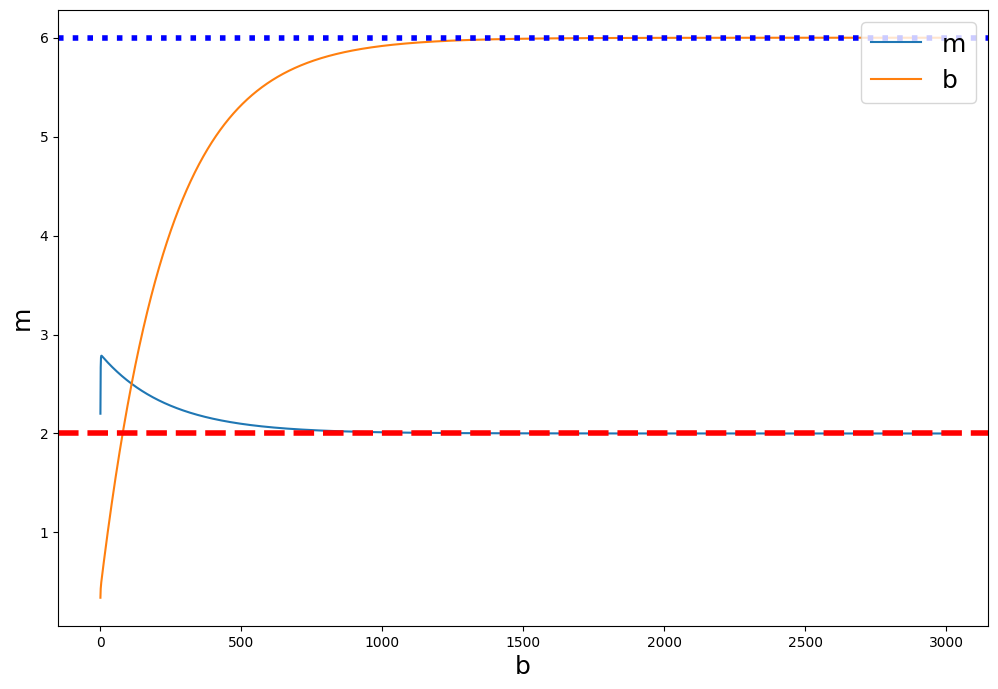

In [18]:

plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.axhline(y=2, xmin=0, xmax=epochs, c='r', linewidth=4,linestyle='--')
plt.axhline(y=6, xmin=0, xmax=epochs, c='b', linewidth=4, linestyle=':')
plt.ylabel('m',fontsize= 18)
plt.xlabel('b',fontsize= 18)
plt.legend(['m', 'b'], loc='upper right', fontsize= 18);

In [20]:
%pip install torch
import torch
from torch import nn

   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   --- ------------------------------------ 18.1/203.0 MB 94.8 MB/s eta 0:00:02
   ------- -------------------------------- 38.0/203.0 MB 96.5 MB/s eta 0:00:02
   ---------- ----------------------------- 55.3/203.0 MB 88.1 MB/s eta 0:00:02
   ------------- -------------------------- 68.7/203.0 MB 82.6 MB/s eta 0:00:02
   -------------- ------------------------- 75.8/203.0 MB 73.2 MB/s eta 0:00:02
   ---------------- ----------------------- 83.6/203.0 MB 65.8 MB/s eta 0:00:02
   ------------------ --------------------- 91.8/203.0 MB 62.3 MB/s eta 0:00:02
   ------------------- -------------------- 99.9/203.0 MB 59.0 MB/s eta 0:00:02
   -------------------- ------------------ 108.0/203.0 MB 57.0 MB/s eta 0:00:02
   ---------------------- ---------------- 116.7/203.0 MB 55.6 MB/s eta 0:00:02
   ------------------------ -------------- 126.1/203.0 MB 54.8 MB/s eta 0:00:02
   ------------------------- ------------- 134.7/

In [24]:
X, Y

(tensor([ 1.0000,  1.0045,  1.0090,  ...,  9.9910,  9.9955, 10.0000]),
 tensor([ 8.0000,  8.0090,  8.0180,  ..., 25.9820, 25.9910, 26.0000]))

## Mit PyTorch

In [25]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
X = torch.linspace(1, 10, 2000, dtype=dtype)
Y = 2*X + 6

# Create random Tensors for weights.
# 2 weights: y = m + b x
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
m = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-5
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = m + b * X

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    # BR: Hier fehlt noch die Divsion durch len (Y)
    loss = (y_pred - Y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        m -= learning_rate * m.grad
        b -= learning_rate * b.grad


        # Manually zero the gradients after updating weights
        m.grad = None
        b.grad = None


print(f'Result: y = {m.item()} + {b.item()} x')

99 2398.699951171875
199 571.700927734375
299 136.25791931152344
399 32.47532653808594
499 7.740078926086426
599 1.844761848449707
699 0.43966662883758545
799 0.1047654002904892
899 0.02497307024896145
999 0.005954334978014231
1099 0.0014205145416781306
1199 0.00033835158683359623
1299 8.105528831947595e-05
1399 1.9138187781209126e-05
1499 4.569092197925784e-06
1599 1.1977117537753657e-06
1699 4.0815939428284764e-07
1799 4.0815939428284764e-07
1899 4.0815939428284764e-07
1999 4.0815939428284764e-07
Result: y = 5.999966621398926 + 2.000005006790161 x


## Übung Mit PyTorch

In [26]:
# -*- coding: utf-8 -*-
import torch
import math

# Eigene function definieren mit ZWEI vars
# Andere X und Y werte
# LR varieren und das training beobachten (zu hohe, zu niedrige LR)
# Macht ein LR range [from, to] - z.B. for loop
#   nimmt das beste LR (minimaler Loss, keine NaNs)
#   "Grid Search
# Plot die wahre und die predictete Funtionen gegeneinander

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
X = torch.linspace(1, 10, 2000, dtype=dtype)
Z = torch.linspace(1, 10, 2000, dtype=dtype)
#Y = 2*X + 6
Y = 2*X + Z + 6

# Create random Tensors for weights.
# 2 weights: y = m + b x
# 2 weights: y = m + b x
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
m1 = torch.randn((), dtype=dtype, requires_grad=True)
m2 = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-8
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = m1 + m2 + b * X

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    # BR: Hier fehlt noch die Divsion durch len (Y)
    loss = (y_pred - Y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        m1 -= learning_rate * m1.grad
        m2 -= learning_rate * m2.grad
        b -= learning_rate * b.grad


        # Manually zero the gradients after updating weights
        m1.grad = None
        m2.grad = None
        b.grad = None


print(f'Result: y = {m1.item()} +  {m2.item()} + {b.item()} x')

99 1104118.25
199 810628.125
299 595259.1875
399 437216.90625
499 321241.78125
599 236136.140625
699 173683.28125
799 127852.9921875
899 94221.1640625
999 69540.5
1099 51428.0234375
1199 38135.83203125
1299 28380.599609375
1399 21221.013671875
1499 15966.12109375
1599 12108.833984375
1699 9277.25
1799 7198.3349609375
1899 5671.6845703125
1999 4550.3232421875
Result: y = 2.186232566833496 +  1.7491642236709595 + 3.106046199798584 x


Wenn die Learning Rate kleiner wird und Epoch bleibt, dann wird das Resultat ungenauer. Wenn die Learning Rate zu gross (-4), dann gibt es nan.

## Mit PyTorch und für komplexe nicht-lineare Funktion


In [27]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# 1. define own non-linear fucnction
# 2. 5 weights y = a + b x + c x2 + d x3 + e x4
# 3. all cases from here and downwards (without nn module)l
# 4. plot the results in each case real function vs approximation

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 632.0022583007812
199 449.70477294921875
299 320.739013671875
399 229.50115966796875
499 164.95286560058594
599 119.28587341308594
699 86.9766845703125
799 64.1176986694336
899 47.94462585449219
999 36.50178527832031
1099 28.405597686767578
1199 22.67722511291504
1299 18.624116897583008
1399 15.756319999694824
1499 13.727170944213867
1599 12.29141616821289
1699 11.275510787963867
1799 10.556674003601074
1899 10.048039436340332
1999 9.688135147094727
Result: y = -0.03122152015566826 + 0.8558003902435303 x + 0.005386229604482651 x^2 + -0.09319661557674408 x^3


## Übung Mit PyTorch und für komplexe nicht-lineare Funktion


In [28]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
#x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
x = torch.linspace(-5, 5, 100, dtype=dtype)
#x = torch.tensor([2.0])
# y = torch.cos(x)
y = x.pow(2) + 3 * x + 2

# 1. define own non-linear funcction
# 2. 5 weights y = a + b x + c x2 + d x3 + e x4
# 3. all cases from here and downwards (without nn module)l
# 4. plot the results in each case real function vs approximation

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
#Pascal, Ändu, Mäk, Peter,
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)
e = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-7
for t in range(10000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        e -= learning_rate * e.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None
        e.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4')

99 10373.5927734375
199 10008.140625
299 9661.642578125
399 9329.568359375
499 9011.279296875
599 8706.228515625
699 8413.830078125
799 8133.54443359375
899 7864.85595703125
999 7607.2705078125
1099 7360.31298828125
1199 7123.533203125
1299 6896.4951171875
1399 6678.78515625
1499 6470.00390625
1599 6269.7734375
1699 6077.72705078125
1799 5893.5205078125
1899 5716.81591796875
1999 5547.294921875
2099 5384.654296875
2199 5228.5986328125
2299 5078.85009765625
2399 4935.13916015625
2499 4797.2099609375
2599 4664.8173828125
2699 4537.724609375
2799 4415.7080078125
2899 4298.5517578125
2999 4186.0498046875
3099 4078.004638671875
3199 3974.227294921875
3299 3874.537109375
3399 3778.760986328125
3499 3686.73291015625
3599 3598.294677734375
3699 3513.2939453125
3799 3431.585693359375
3899 3353.0302734375
3999 3277.49560546875
4099 3204.852783203125
4199 3134.980712890625
4299 3067.762451171875
4399 3003.0859375
4499 2940.844482421875
4599 2880.93505859375
4699 2823.259765625
4799 2767.724853515

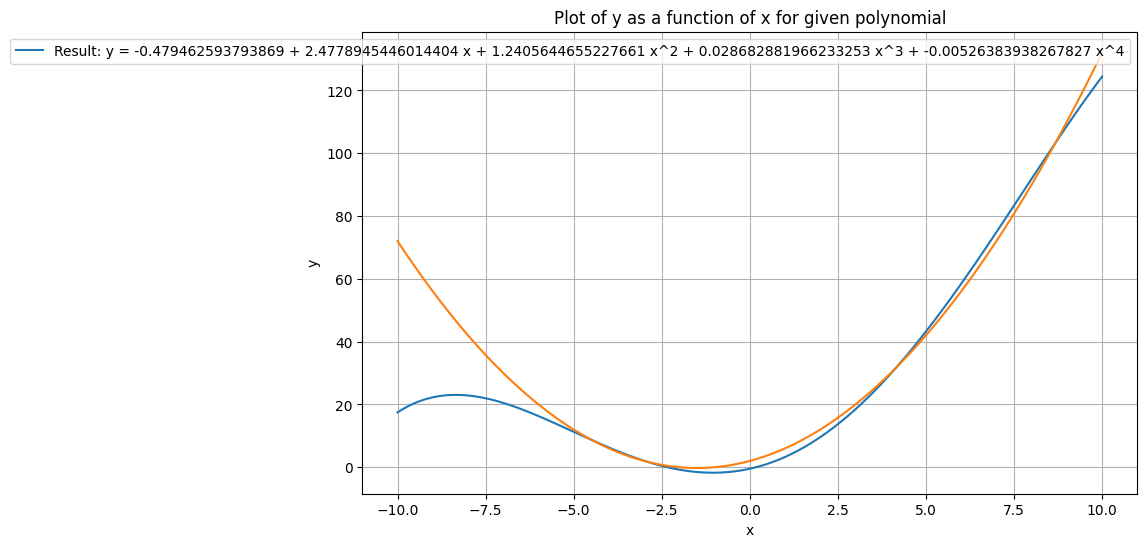

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formula as a function
def polynomial(x):
    return (a.item()
            + b.item() * x
            + c.item() * x**2
            + d.item() * x**3
            + e.item() * x**4)

def polynomialOpt(x):
    return ( x**2 + 3 * x + 2 )

# Define a range for x values and compute y values accordingly
x_values = np.linspace(-10, 10, 400)  # Chose range -2 to 2 based on typical polynomial behavior
y_values = polynomial(x_values)
y_values_opt = polynomialOpt(x_values)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3 + {e.item()} x^4')
plt.plot(x_values, y_values_opt)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y as a function of x for given polynomial")
plt.legend()
plt.grid(True)
plt.show()

## Mit PyTorch und nn module

In [38]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [30]:
x.shape

torch.Size([2000])

In [39]:
# p = torch.tensor([1, 2, 3])
x.unsqueeze(-1).shape

torch.Size([2000, 1])

In [40]:
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
xx.shape

torch.Size([2000, 3])

In [44]:
fc = torch.nn.Linear(3, 1)
flat = torch.nn.Flatten(0,1)

In [45]:
out = fc(xx)
out.shape

torch.Size([2000, 1])

In [46]:
flat(out).shape

torch.Size([2000])

In [47]:

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1),

)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 555.7418823242188
199 371.4017639160156
299 249.23455810546875
399 168.25917053222656
499 114.57797241210938
599 78.98490142822266
699 55.38071060180664
799 39.72419357299805
899 29.337114334106445
999 22.444473266601562
1099 17.869548797607422
1199 14.832366943359375
1299 12.815468788146973
1399 11.475688934326172
1499 10.585488319396973
1599 9.993810653686523
1699 9.600432395935059
1799 9.338777542114258
1899 9.164685249328613
1999 9.048805236816406
Result: y = -0.005610628053545952 + 0.8428723216056824 x + 0.0009679266950115561 x^2 + -0.09135770797729492 x^3


## ...mit einem Optimizer

In [37]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 48071.5546875
199 25741.068359375
299 12747.9365234375
399 5479.43212890625
499 2082.614990234375
599 956.9146728515625
699 725.698486328125
799 640.998291015625
899 544.5895385742188
999 438.15869140625
1099 334.73529052734375
1199 243.38783264160156
1299 167.86854553222656
1399 108.80781555175781
1499 65.4535140991211
1599 36.33442687988281
1699 19.32802391052246
1799 11.73690128326416
1899 9.191413879394531
1999 8.864845275878906
Result: y = 0.00032599244150333107 + 0.8529368042945862 x + 0.00032593117794021964 x^2 + -0.09245385229587555 x^3
